In [23]:
import nilmtk

from nilmtk.dataset_converters import convert_redd
convert_redd('C:\\Users\\Kim-Taesu\\Documents\\nilm\\low_freq', 'C:\\Users\\Kim-Taesu\\Documents\\nilm\\data\\redd.h5')


Loading house 1... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Loading house 2... 1 2 3 4 5 6 7 8 9 10 11 
Loading house 3... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Loading house 4... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Loading house 5... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
Loading house 6... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 
Loaded metadata
Done converting YAML metadata to HDF5!
Done converting REDD to HDF5!


In [24]:
from nilmtk import DataSet
from nilmtk.utils import print_dict

redd = DataSet('C:\\Users\\Kim-Taesu\\Documents\\nilm\\data\\redd.h5')

In [25]:
print_dict(redd.metadata)

In [26]:
print_dict(redd.buildings)

In [27]:
print_dict(redd.buildings[1].metadata)

In [28]:
redd.buildings[1].elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric 

In [155]:

from nilmtk import DataSet

iawe = DataSet('C:\\Users\\Kim-Taesu\\Documents\\nilm\\data\\redd.h5')
elec = iawe.buildings[1].elec
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric 

In [36]:
fridge = elec['fridge']
fridge.available_columns()

[('power', 'active')]

In [37]:
df = next(fridge.load())
df.head()

physical_quantity,power
type,active
2011-04-18 09:22:13-04:00,6.0
2011-04-18 09:22:16-04:00,6.0
2011-04-18 09:22:20-04:00,6.0
2011-04-18 09:22:23-04:00,6.0
2011-04-18 09:22:26-04:00,6.0


In [38]:
series = next(fridge.power_series())
series.head()

2011-04-18 09:22:13-04:00    6.0
2011-04-18 09:22:16-04:00    6.0
2011-04-18 09:22:20-04:00    6.0
2011-04-18 09:22:23-04:00    6.0
2011-04-18 09:22:26-04:00    6.0
Name: (power, active), dtype: float32

In [70]:
# 모든 NILM 데이터 세트는 다양한 전기 계량기 그룹으로 구성됩니다. 
# 미터를 집별로 그룹화 할 수 있습니다. 
# 또는 직접 연결된 기기 유형에 따라 다릅니다. 또는 샘플 속도로. 
# 또는 미터가 전체 "사이트 미터"인지 또는 기기 레벨 서브 미터인지 또는 회로 레벨 서브 미터인지에 따라 결정됩니다.

from matplotlib import rcParams  0
import pandas as pd
import nilmtk
from nilmtk import DataSet, MeterGroup

plt.style.use('ggplot')
rcParams['figure.figsize'] = (13, 10)

redd = DataSet('C:\\Users\\Kim-Taesu\\Documents\\nilm\\data\\redd.h5')

# buildings의 MeterGroup 출력
elec = redd.buildings[1].elec
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric 

In [40]:
# nested Metergroup 출력
# buildings 1의 경우 North American and Canadian 기준 240볼트를 nested Metergroup으로 구분
#    1개는 전기 오븐용, 1개는 세탁기 건조기
elec.nested_metergroups()

[MeterGroup(meters=
   ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
   ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
 ), MeterGroup(meters=
   ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
   ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
 )]

In [41]:
# 서브미터와 메인 MeterGroup을 확인
elec.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [71]:
# 메인 MeterGroup의 전력량을 합친다.
elec.mains().power_series_all_data().head()

Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


2011-04-18 09:22:09-04:00    342.820007
2011-04-18 09:22:10-04:00    344.559998
2011-04-18 09:22:11-04:00    345.140015
2011-04-18 09:22:12-04:00    341.679993
2011-04-18 09:22:13-04:00    341.029999
Name: (power, apparent), dtype: float32

In [77]:
# 서브 meterGroup의 전력량 확인
elec.submeters()
elec.submeters().power_series_all_data().head()

<generator object Electric.load_series at 0x000001A8AB825BA0>

In [44]:
# 빌딩 1에서 계량된 에너지의 비율 계산
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


C:\Users\Kim-Taesu\Desktop\nilmtk\nilmtk\metergroup.py:939: UserWarning: As a quick implementation we only get Good Sections from the first meter in the meter group.  We should really return the intersection of the good sections for all meters.  This will be fixed...
  warnings.warn("As a quick implementation we only get Good Sections from"


Calculating total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...   

C:\Users\Kim-Taesu\Desktop\nilmtk\nilmtk\electric.py:305: UserWarning: No shared AC types.  Using 'active' for submeter and 'apparent' for other.
  " and '{:s}' for other.".format(ac_type, other_ac_type))
C:\Users\Kim-Taesu\Desktop\nilmtk\nilmtk\metergroup.py:939: UserWarning: As a quick implementation we only get Good Sections from the first meter in the meter group.  We should really return the intersection of the good sections for all meters.  This will be fixed...
  warnings.warn("As a quick implementation we only get Good Sections from"


Calculating total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...   

0.7599031850888346

In [45]:
mains = elec.mains()

In [46]:
mains.available_ac_types('power')

['apparent']

In [47]:
elec.submeters().available_ac_types('power')

['active']

In [48]:
next(elec.load())

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')      dataset='REDD'), ElecMeterID(instance=4, building=1, dataset='REDD')))     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')      dataset='REDD'), ElecMeterID(instance=20, building=1, dataset='REDD')))     
Done loading data all meters for this chunk.

Done loading data all meters for this chunk.


physical_quantity          power            
type                      active    apparent
2011-04-18 09:22:09-04:00    NaN  344.173340
2011-04-18 09:22:12-04:00  261.0  341.170013
2011-04-18 09:22:15-04:00  261.0  341.973328
2011-04-18 09:22:18-04:00  262.0  341.683319
2011-04-18 09:22:21-04:00  262.0  341.796661
2011-04-18 09:22:24-04:00  261.0  341.330017
2011-04-18 09:22:27-04:00  261.0  341.223328
2011-04-18 09:22:30-04:00  260.0  341.250000
2011-04-18 09:22:33-04:00  260.0  341.503326
2011-04-18 09:22:36-04:00  262.0  342.196655
2011-04-18 09:22:39-04:00  266.0  345.356689
2011-04-18 09:22:42-04:00  260.0  342.736664
2011-04-18 09:22:45-04:00  261.0  342.610016
2011-04-18 09:22:48-04:00  261.0  342.683350
2011-04-18 09:22:51-04:00  267.0  344.553345
2011-04-18 09:22:54-04:00  262.0  341.613342
2011-04-18 09:22:57-04:00  264.0  344.770020
2011-04-18 09:23:00-04:00  267.0  345.350006
2011-04-18 09:23:03-04:00  266.0  344.976654
2011-04-18 09:23:06-04:00  260.0  343.896667
2011-04-18 09:23:09-04:00  260.0  344.713318
2011-04-18 09:23:12-04:00  260.0  344.549988
2011-04-18 09:23:15-04:00  260.0  345.026672
2011-04-18 09:23:18-04:00  260.0  345.353333
2011-04-18 09:23:21-04:00  264.0  344.380005
2011-04-18 09:23:24-04:00  264.0  345.903320
2011-04-18 09:23:27-04:00  263.0  344.033325
2011-04-18 09:23:30-04:00  263.0  346.293335
2011-04-18 09:23:33-04:00  266.0  345.863342
2011-04-18 09:23:36-04:00  267.0  345.149994
...                          ...         ...
2011-05-24 15:55:33-04:00  246.0  274.713348
2011-05-24 15:55:36-04:00  247.0  277.260010
2011-05-24 15:55:39-04:00  247.0  276.209991
2011-05-24 15:55:42-04:00  240.0  274.000000
2011-05-24 15:55:45-04:00  240.0  274.250000
2011-05-24 15:55:48-04:00  244.0  275.653320
2011-05-24 15:55:51-04:00  246.0  277.756653
2011-05-24 15:55:54-04:00  242.0  275.173340
2011-05-24 15:55:57-04:00  240.0  274.473328
2011-05-24 15:56:00-04:00  240.0  273.679993
2011-05-24 15:56:03-04:00  243.0  272.766663
2011-05-24 15:56:06-04:00  241.0  273.660004
2011-05-24 15:56:09-04:00  242.0  273.729980
2011-05-24 15:56:12-04:00  245.0  273.609985
2011-05-24 15:56:15-04:00  243.0  273.743347
2011-05-24 15:56:18-04:00  242.0  274.056671
2011-05-24 15:56:21-04:00  240.0  273.526672
2011-05-24 15:56:24-04:00  240.0  274.350006
2011-05-24 15:56:27-04:00  243.0  274.796692
2011-05-24 15:56:30-04:00  242.0  274.220001
2011-05-24 15:56:33-04:00  241.0  273.739990
2011-05-24 15:56:36-04:00    NaN  274.326660
2011-05-24 15:56:39-04:00    NaN  275.693329
2011-05-24 15:56:42-04:00    NaN  273.793335
2011-05-24 15:56:45-04:00    NaN  273.366669
2011-05-24 15:56:48-04:00    NaN  273.266663
2011-05-24 15:56:51-04:00    NaN  274.496674
2011-05-24 15:56:54-04:00    NaN  273.959991
2011-05-24 15:56:57-04:00    NaN  273.636658
2011-05-24 15:57:00-04:00    NaN  273.825012

[1044698 rows x 2 columns]

In [88]:
# 총 에너지 사용량 kWh
elec.mains().total_energy()

Calculating total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...   

apparent    167.766283
dtype: float64

In [1]:
# 각 컬럼들은 기기 번호를 나타낸다.
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

# main Metergroup의 시간당 미터
# energy_per_meter = elec.mains().energy_per_meter()
# energy_per_meter


NameError: name 'elec' is not defined

In [91]:
# energy_per_meter is a DataFrame where each row is a 
# power type ('active', 'reactive' or 'apparent').
# All appliance meters in REDD are record 'active' so just select
# the 'active' row:

# active 상태였고, 20 kWh 이상 쓴 전자기기 넘버
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

15/16 MeterGroup(meters==19, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=2)])e=1)])ce=1)])
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters= for ElecMeterID(instance=4, building=1, dataset='REDD') ...   
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   

(5, 1, REDD)                         44.750925
(8, 1, REDD)                         22.939649
(9, 1, REDD)                         30.734511
(((10, 1, REDD), (20, 1, REDD)),)    32.614809
Name: active, dtype: float64

In [52]:
# 20 kWh 쓴 전자기기 인덱스 확인
instances = more_than_20.index
instances

Index([                       (5, 1, 'REDD'),
                              (8, 1, 'REDD'),
                              (9, 1, 'REDD'),
       (((10, 1, 'REDD'), (20, 1, 'REDD')),)],
      dtype='object')

In [92]:
# fraction_per_meter 함수는 energy_per_submeter와 동일한 기능을 수행하지만 미터당 에너지 비율을 반환합니다.
fraction = elec.submeters().fraction_per_meter().dropna()

15/16 MeterGroup(meters==19, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=2)])e=1)])ce=1)])
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters= for ElecMeterID(instance=4, building=1, dataset='REDD') ...   
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   

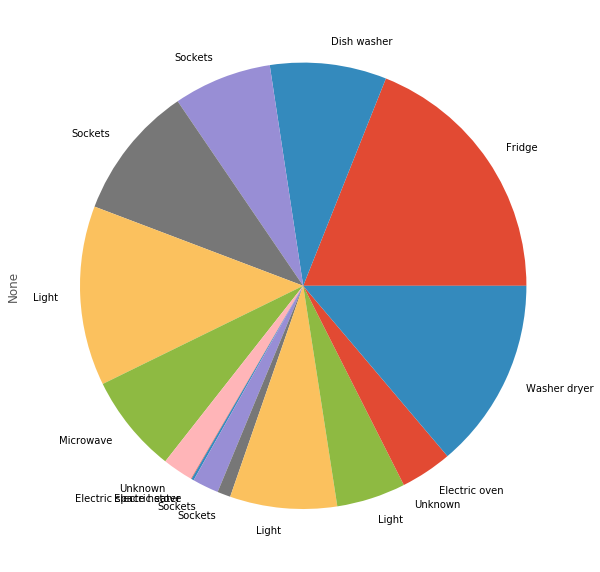

In [94]:
# Create convenient labels
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

(<networkx.classes.digraph.DiGraph at 0x1a899f55470>,
 <matplotlib.axes._axes.Axes at 0x1a89a152c18>)

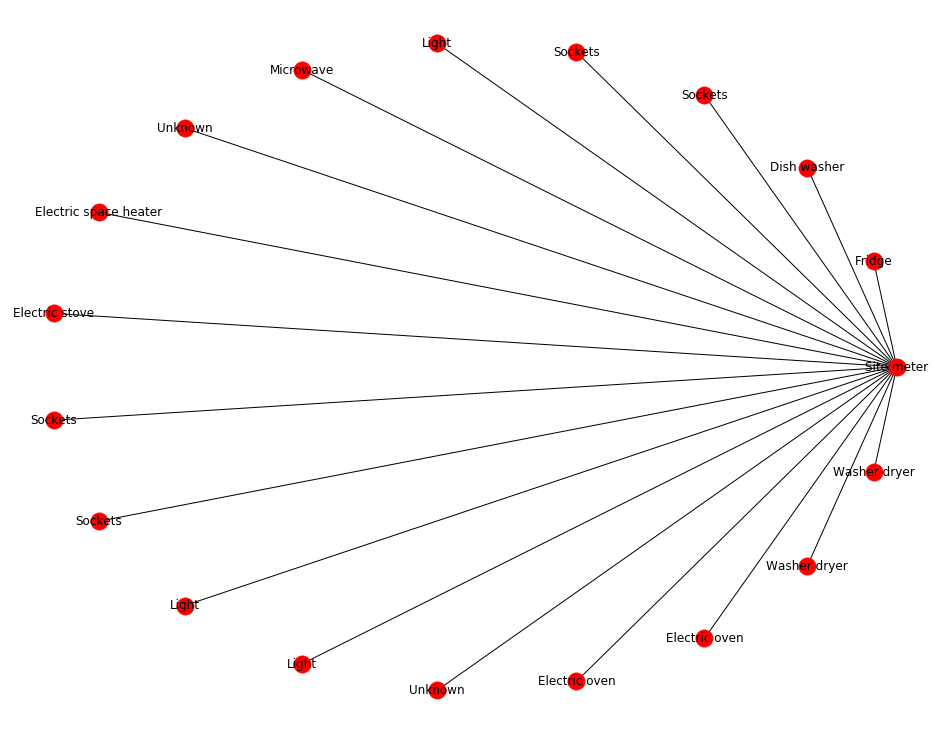

In [55]:
elec.draw_wiring_graph()

In [95]:
elec.meters_directly_downstream_of_mains()

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=14, building=1, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(insta

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


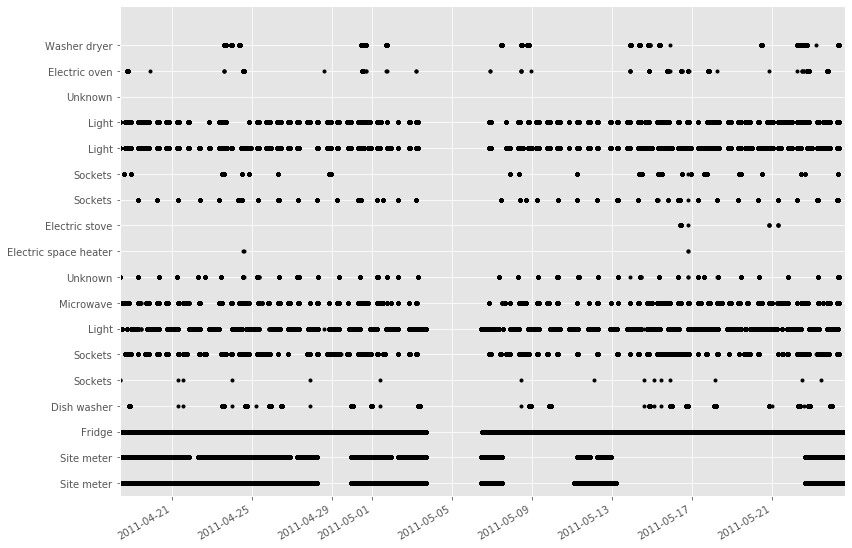

In [96]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

In [188]:
# ElectMeter는 Appliance의 리스트를 가지고 있다.
# MeterGroup의 total_energy and available_power_ac_types and power_series and power_series_all_data. 사용가능


# 단일 전자기기 (냉장고)
fridge_meter = elec['fridge']

fidge_df = next(fridge_meter.load())




# main meter group이 된다.
# fridge_meter.upstream_meter() # happens to be the mains meter group!

In [98]:
fridge_meter.device

{'model': 'eMonitor',
 'manufacturer': 'Powerhouse Dynamics',
 'manufacturer_url': 'http://powerhousedynamics.com',
 'description': 'Measures circuit-level power demand.  Comes with 24 CTs. This FAQ page suggests the eMonitor measures real (active) power: http://www.energycircle.com/node/14103  although the REDD readme.txt says all channels record apparent power.\n',
 'sample_period': 3,
 'max_sample_period': 50,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 5000,
   'lower_limit': 0}],
 'wireless': False}

In [99]:
fridge_meter.dominant_appliance()

Appliance(type='fridge', instance=1)

In [100]:
# 특정기기의 총 에너지 사용량
fridge_meter.total_energy() # kWh

active    44.750925
dtype: float64

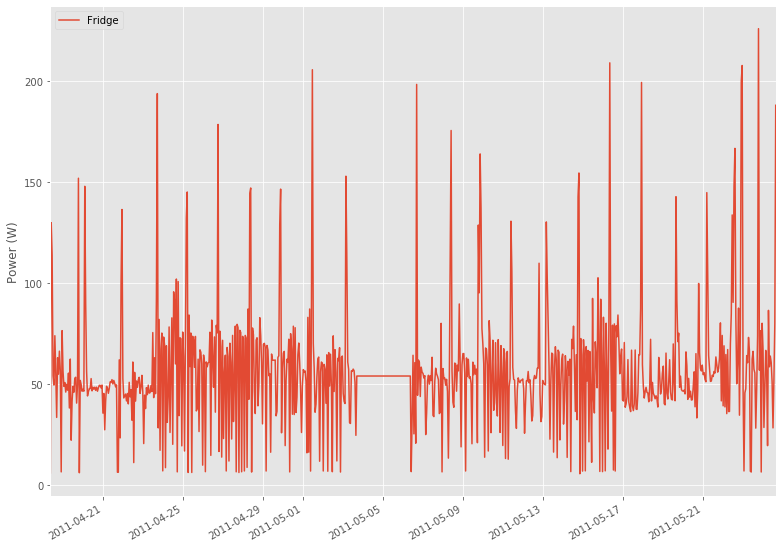

In [101]:
fridge_meter.plot()

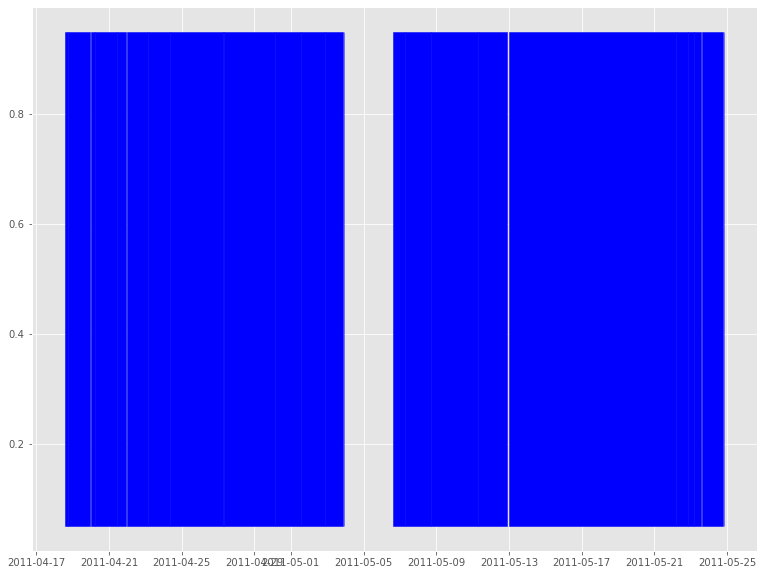

In [102]:
# '좋은 섹션'(즉, 모든 연속 샘플 쌍이 데이터 세트 메타 데이터에 지정된 max_sample_period보다 작은 섹션)을 
#    자동으로 식별 할 수 있습니다.

good_sections = fridge_meter.good_sections(full_results=True)
# specifying full_results=False would give us a simple list of 
# TimeFrames.  But we want the full GoodSectionsResults object so we can
# plot the good sections...
good_sections.plot()

# 파란색 청크는 데이터가 좋은 위치를 나타냅니다. 
# 화이트 갭은 미가공 전력 데이터에서 볼 수있는 큰 갭입니다. 
# 이 확대 / 축소 수준에서는 볼 수없는 작은 간격이 많이 있습니다.

In [103]:
# 우리는 또한 정확한 섹션이 식별되는 것을 볼 수 있습니다
good_sections.combined()

[TimeFrame(start='2011-04-18 09:22:13-04:00', end='2011-04-18 14:00:33-04:00', empty=False),
 TimeFrame(start='2011-04-18 14:03:11-04:00', end='2011-04-19 18:45:09-04:00', empty=False),
 TimeFrame(start='2011-04-19 20:20:05-04:00', end='2011-04-20 01:54:26-04:00', empty=False),
 TimeFrame(start='2011-04-20 01:55:33-04:00', end='2011-04-21 06:14:43-04:00', empty=False),
 TimeFrame(start='2011-04-21 06:17:22-04:00', end='2011-04-21 17:45:02-04:00', empty=False),
 TimeFrame(start='2011-04-21 19:41:23-04:00', end='2011-04-22 22:46:53-04:00', empty=False),
 TimeFrame(start='2011-04-22 22:48:31-04:00', end='2011-04-24 03:48:44-04:00', empty=False),
 TimeFrame(start='2011-04-24 03:52:28-04:00', end='2011-04-27 02:50:14-04:00', empty=False),
 TimeFrame(start='2011-04-27 02:51:25-04:00', end='2011-04-27 03:17:31-04:00', empty=False),
 TimeFrame(start='2011-04-27 03:21:19-04:00', end='2011-04-29 23:07:52-04:00', empty=False),
 TimeFrame(start='2011-04-29 23:10:38-04:00', end='2011-05-01 09:44:36

In [104]:
# 전체 시스템이 다운되어 큰 격차가 발생할뿐만 아니라 무선 센서가 데이터를 삭제함으로써 빈틈이 생깁니다. 
# 이것을 '드롭 아웃'이라고도합니다. 탈락률은 누락 된 샘플의 비율을 지정하는 0과 1 사이의 숫자입니다. 
# 드롭 아웃 률이 0이면 샘플이 누락되지 않았 음을 의미합니다. 값이 1이면 모든 샘플이 누락되었음을 의미합니다.


fridge_meter.dropout_rate()

# 차이를 무시하고 있기 때문에 드롭 아웃 비율이 떨어졌습니다 (좋습니다!). 
# 이 값은 아마도 무선 시스템의 성능을 나타내는 것입니다.

0.21922786156570626

In [105]:
# ElecMeter.select_using_appliances ()를 사용하여 메타 데이터 필드를 사용하여 새 MeterGroup을 선택합니다. 
# 예를 들어, REDD 데이터 세트 전체에서 모든 세탁기 건조기를 가져 오려면 다음을 수행하십시오.
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='washer dryer')

MeterGroup(meters=
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=7, building=2, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=13, building=3, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=14, building=3, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=7, building=4, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=8, building=5, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=9, building=5, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=4, building=6, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1

In [106]:
# 여러 전자기기 선택
elec.select_using_appliances(type=['fridge', 'microwave'])

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
)

In [107]:
# heating 기능이 있는 모든 전자기기 get
nilmtk.global_meter_group.select_using_appliances(category='heating')

MeterGroup(meters=
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=10, building=3, dataset='REDD', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=4, building=4, dataset='REDD', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=6, building=5, dataset='REDD', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=12, building=5, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=13, building=5, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=12, building=6, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])
)

In [108]:
# 빌딩 1의 single-phase induction motor만 get
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
)

In [109]:
# (NILMTK는 다양한 카테고리 분류법을 포함하는 NILM 메타 데이터 프로젝트에서 '공통 메타 데이터'를 가져옵니다.)
nilmtk.global_meter_group.select_using_appliances(building=2, category='laundry appliances')

MeterGroup(meters=
  ElecMeter(instance=7, building=2, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=10, building=2, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=11, building=2, dataset='REDD', appliances=[Appliance(type='waste disposal unit', instance=1)])
)

In [110]:
# 기기 속성이 아닌 미터의 속성에서 미터 그룹을 선택
elec.select(device_model='REDD_whole_house')

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [111]:
elec.select(sample_period=3)

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=14, building=1, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(insta

In [112]:
# MeterGroup에서 단일 미터를 선택

# 각 미터에 연결된 기기를 사용하여 미터 검색
elec['fridge']

ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])

In [113]:
elec.select_using_appliances(type='fridge')

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
)

In [114]:
elec['light', 2]

ElecMeter(instance=17, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=2)])

In [115]:
import nilmtk
nilmtk.global_meter_group[{'dataset': 'REDD', 'building': 1, 'type': 'fridge', 'instance': 1}]

ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])

In [116]:
# ElecMeter의 세부 사항을 사용하여 미터 검색
elec[1]

ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])

In [117]:
# 인스턴스 번호 매기기
# ElecMeter 및 Appliance 인스턴스 번호는 전 세계가 아닌 건물 내 미터 또는 어플라이언스 유형을 고유하게 식별합니다. 
# 전 세계적으로 미터를 고유하게 식별하려면 세 가지 키가 필요합니다.

from nilmtk.elecmeter import ElecMeterID 
# ElecMeterID is a namedtuple for uniquely identifying each ElecMeter

nilmtk.global_meter_group[ElecMeterID(instance=8, building=1, dataset='REDD')]

ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])

In [118]:
# 중첩 된 MeterGroup 선택
# 기존의 단일 MeterGroup을 선택할 수도 있습니다. 중첩 된 MeterGroup을 지정하는 방법에는 두 가지가 있습니다.
elec[[ElecMeterID(instance=3, building=1, dataset='REDD'), 
      ElecMeterID(instance=4, building=1, dataset='REDD')]]

MeterGroup(meters=
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
)

In [119]:
elec[ElecMeterID(instance=(3,4), building=1, dataset='REDD')]

MeterGroup(meters=
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
)

In [120]:
# 미터 인스턴스 0을 요청하여 메인을 확인할 수도 있습니다.
elec[ElecMeterID(instance=0, building=1, dataset='REDD')]

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

In [121]:
# 같은 명령어
elec.mains() == elec[ElecMeterID(instance=0, building=1, dataset='REDD')]

True

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


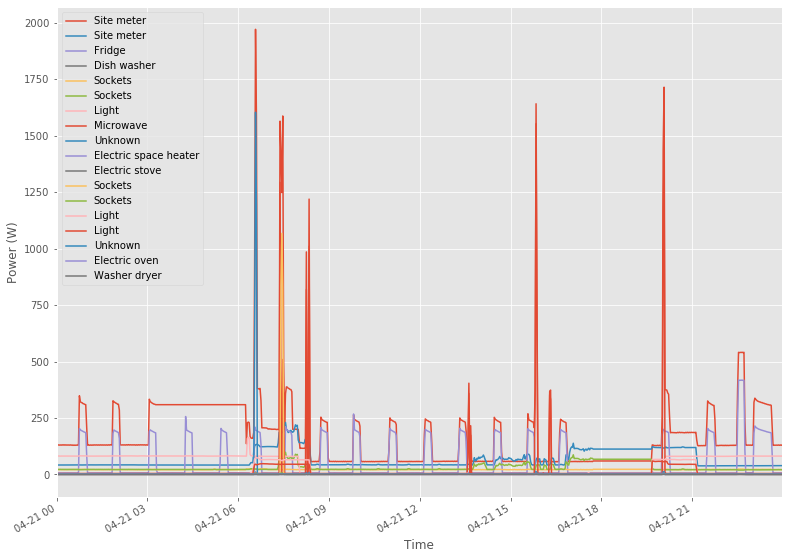

In [122]:
redd.set_window(start='2011-04-21', end='2011-04-22')
elec.plot();
plt.xlabel("Time");

Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


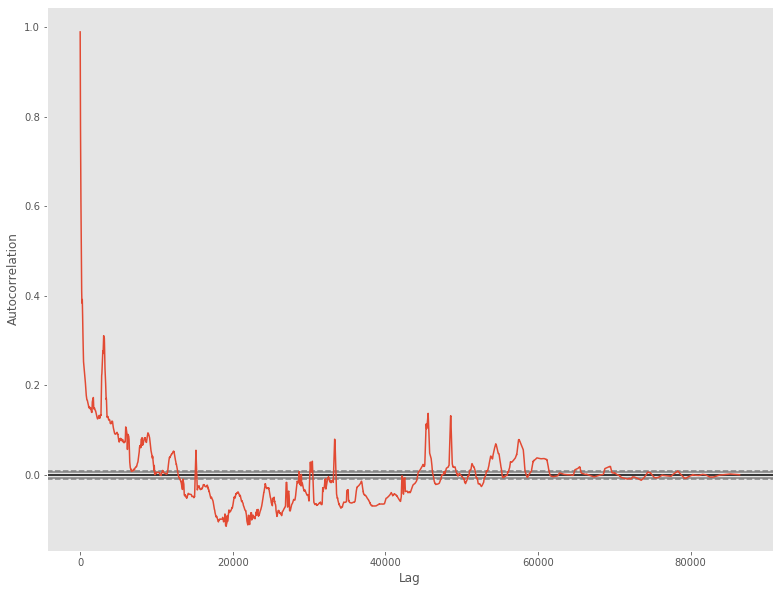

In [124]:
from pandas.plotting import autocorrelation_plot

elec.mains().plot_autocorrelation();

In [125]:
# 데이터 세트에서 냉장고 전체의 일일 에너지 소비
fridges_restricted = nilmtk.global_meter_group.select_using_appliances(type='fridge')
daily_energy = pd.Series([meter.average_energy_per_period(offset_alias='D') 
                          for meter in fridges_restricted.meters])

# daily_energy.plot(kind='hist');
# plt.title('Histogram of daily fridge energy');
# plt.xlabel('energy (kWh)');
# plt.ylabel('occurences');
# plt.legend().set_visible(False)

daily_energy

0    active    1.349099
dtype: float64
1    active    1.914858
dtype: float64
2    active    1.139238
dtype: float64
3    active    1.669544
dtype: float64
4    active    1.853019
dtype: float64
dtype: object

In [126]:
# 어플라이언스의 연관 데이터 프레임
correlation_df = elec.pairwise_correlation()
correlation_df

Loading data for meter ElecMeterID(instance=3, building=1, dataset='REDD')     

C:\Users\Kim-Taesu\Desktop\nilmtk\nilmtk\electric.py:373: RuntimeWarning: invalid value encountered in double_scalars
  corr = numerator / denominator


Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chun

,"(1, 1, REDD)","(2, 1, REDD)","(5, 1, REDD)","(6, 1, REDD)","(7, 1, REDD)","(8, 1, REDD)","(9, 1, REDD)","(11, 1, REDD)","(12, 1, REDD)","(13, 1, REDD)","(14, 1, REDD)","(15, 1, REDD)","(16, 1, REDD)","(17, 1, REDD)","(18, 1, REDD)","(19, 1, REDD)","(((3, 1, REDD), (4, 1, REDD)),)","(((10, 1, REDD), (20, 1, REDD)),)"
"(1, 1, REDD)",1,0.133881,0.377359,0.162288,-0.00471913,-0.0996323,0.329465,0.674169,0.435024,0.784056,0.831063,0.315794,0.681408,0.288833,0.283513,NaN,0.0212352,0.144032
"(2, 1, REDD)",0.133881,1,-0.0937125,-0.0359251,0.249301,0.702927,-0.0932022,0.117099,0.0877732,0.143877,0.162691,0.178104,0.221559,0.749084,0.737687,NaN,0.00256023,-0.0340499
"(5, 1, REDD)",0.377359,-0.0937125,1,0.544081,0.214719,-0.145134,0.108847,0.00518485,0.0879256,0.0613822,0.0946321,-0.0270217,0.0298573,-0.00203541,0.00180875,NaN,0.121275,0.411608
"(6, 1, REDD)",0.162288,-0.0359251,0.544081,1,0.211379,-0.0492527,0.0423541,0.0292081,-0.00568256,0.020327,0.0725096,-0.00771563,0.0112727,-0.0120231,-0.00784038,NaN,0.130844,0.558686
"(7, 1, REDD)",-0.00471913,0.249301,0.214719,0.211379,1,0.358102,-0.135737,-0.00587421,0.00151782,-0.00177207,0.00664499,-0.0170461,-0.0124059,0.0058632,0.00548738,NaN,0.0344461,0.138726
"(8, 1, REDD)",-0.0996323,0.702927,-0.145134,-0.0492527,0.358102,1,-0.352982,0.0356909,-0.0201429,0.0127344,0.027573,0.131574,0.101213,0.0626436,0.0524957,NaN,-0.0106104,-0.0446488
"(9, 1, REDD)",0.329465,-0.0932022,0.108847,0.0423541,-0.135737,-0.352982,1,-0.0484712,0.0486186,-0.00604461,0.00686124,0.052323,0.0451693,0.206243,0.187374,NaN,-0.0069217,0.0612987
"(11, 1, REDD)",0.674169,0.117099,0.00518485,0.0292081,-0.00587421,0.0356909,-0.0484712,1,0.00875737,0.748305,0.755141,0.0393549,0.37349,0.135711,0.144454,NaN,-0.00169212,0.0343062
"(12, 1, REDD)",0.435024,0.0877732,0.0879256,-0.00568256,0.00151782,-0.0201429,0.0486186,0.00875737,1,0.653199,0.62843,0.000221234,0.480808,0.147108,0.119364,NaN,-0.000819459,-0.00263386
"(13, 1, REDD)",0.784056,0.143877,0.0613822,0.020327,-0.00177207,0.0127344,-0.00604461,0.748305,0.653199,1,0.98348,0.0303775,0.607367,0.1968,0.185798,NaN,-0.00188285,0.0228828


In [128]:
from __future__ import print_function, division
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from six import iteritems

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM
import nilmtk.utils

rcParams['figure.figsize'] = (13, 6)

In [129]:
train = DataSet('C:\\Users\\Kim-Taesu\\Documents\\nilm\\data\\redd.h5')
test = DataSet('C:\\Users\\Kim-Taesu\\Documents\\nilm\\data\\redd.h5')

In [130]:
building = 1

In [177]:
train.set_window(end="2011-04-30")
test.set_window(start="2011-04-30")

train_elec = train.buildings[1].elec
test_elec = test.buildings[1].elec
light_elec = test_elec['light']

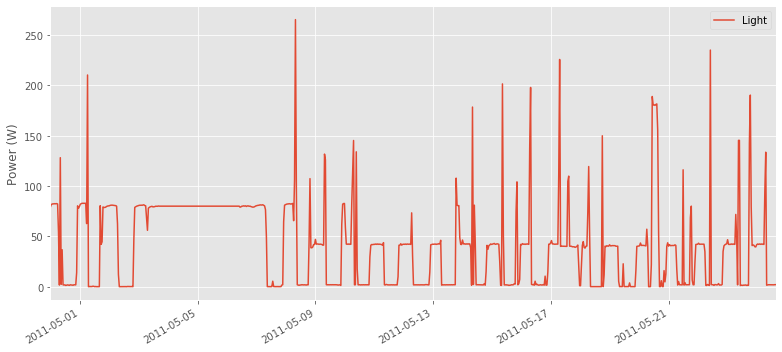

In [179]:
# train_elec.plot()
light_elec.plot()

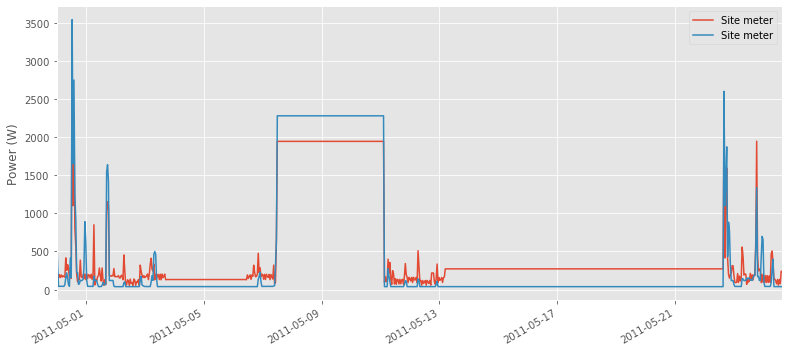

In [134]:
test_elec.mains().plot()

In [135]:
# REDD 데이터 세트에는 3 또는 4 초마다 어플라이언스 레벨 데이터가 샘플링되고 1 초마다 메인 데이터가 샘플링되었습니다.
fridge_meter = train_elec['fridge']

In [136]:
fridge_df = next(fridge_meter.load())

In [137]:
fridge_df.head()

physical_quantity,power
type,active
2011-04-18 09:22:13-04:00,6.0
2011-04-18 09:22:16-04:00,6.0
2011-04-18 09:22:20-04:00,6.0
2011-04-18 09:22:23-04:00,6.0
2011-04-18 09:22:26-04:00,6.0


In [157]:
mains = train_elec.mains()

In [158]:
mains_df = next(mains.load())

Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


In [159]:
mains_df.head()

physical_quantity,power
type,apparent
2011-04-18 09:22:09-04:00,342.820007
2011-04-18 09:22:10-04:00,344.559998
2011-04-18 09:22:11-04:00,345.140015
2011-04-18 09:22:12-04:00,341.679993
2011-04-18 09:22:13-04:00,341.029999


In [160]:
# 둘 다 서로 다른 주파수로 샘플링되므로 1 분 분해능으로 다운 샘플링합니다. 
# 또한 에너지 소비 측면에서 상위 5 개 기기를 선택하고 FHMM 및 CO 모델 교육에 사용할 것입니다.

top_5_train_elec = train_elec.submeters().select_top_k(k=5)

15/16 MeterGroup(meters==19, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=2)])e=1)])ce=1)])
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters= for ElecMeterID(instance=3, building=1, dataset='REDD') ...    for ElecMeterID(instance=4, building=1, dataset='REDD') ...   
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   

In [161]:
top_5_train_elec

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
)

In [162]:
# 주 데이터를 구성 기기로 분리하고 예측을 반환하는 기능
def predict(clf, test_elec, sample_period, timezone):
    pred = {}
    gt= {}
    
    # "ac_type" varies according to the dataset used. 
    # Make sure to use the correct ac_type before using the default parameters in this code.    
    for i, chunk in enumerate(test_elec.mains().load(physical_quantity = 'power', ac_type = 'apparent', sample_period=sample_period)):
        chunk_drop_na = chunk.dropna()
        pred[i] = clf.disaggregate_chunk(chunk_drop_na)
        gt[i]={}

        for meter in test_elec.submeters().meters:
            # Only use the meters that we trained on (this saves time!)    
            gt[i][meter] = next(meter.load(physical_quantity = 'power', ac_type = 'active', sample_period=sample_period))
        gt[i] = pd.DataFrame({k:v.squeeze() for k,v in iteritems(gt[i]) if len(v)}, index=next(iter(gt[i].values())).index).dropna()
        
    # If everything can fit in memory
    gt_overall = pd.concat(gt)
    gt_overall.index = gt_overall.index.droplevel()
    pred_overall = pd.concat(pred)
    pred_overall.index = pred_overall.index.droplevel()

    # Having the same order of columns
    gt_overall = gt_overall[pred_overall.columns]
    
    #Intersection of index
    gt_index_utc = gt_overall.index.tz_convert("UTC")
    pred_index_utc = pred_overall.index.tz_convert("UTC")
    common_index_utc = gt_index_utc.intersection(pred_index_utc)
    
    common_index_local = common_index_utc.tz_convert(timezone)
    gt_overall = gt_overall.loc[common_index_local]
    pred_overall = pred_overall.loc[common_index_local]
    appliance_labels = [m for m in gt_overall.columns.values]
    gt_overall.columns = appliance_labels
    pred_overall.columns = appliance_labels
    return gt_overall, pred_overall

In [163]:
# 2 가지 벤치마킹 알고리즘을 사용하여 훈련-조합 최적화 (CO) 및 팩토리 히든 마르코프 모델 (FHMM)

classifiers = {'CO':CombinatorialOptimisation(), 'FHMM':FHMM()}
predictions = {}
sample_period = 120
for clf_name, clf in classifiers.items():
    print("*"*20)
    print(clf_name)
    print("*" *20)
    start = time.time()
    # Note that we have given the sample period to downsample the data to 1 minute. 
    # If instead of top_5 we wanted to train on all appliance, we would write 
    # fhmm.train(train_elec, sample_period=60)
    clf.train(top_5_train_elec, sample_period=sample_period)
    end = time.time()
    print("Runtime =", end-start, "seconds.")
    gt, predictions[clf_name] = predict(clf, test_elec, sample_period, train.metadata['timezone'])

********************
CO
********************
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])'


C:\Users\Kim-Taesu\Anaconda3\envs\nilmtk-env\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Training model for submeter 'ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])'
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])'
Training model for submeter 'ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])'
Done training!
Runtime = 1.5081288814544678 seconds.
Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Estimating power demand for 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])'
Estimating power demand for 'ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])'
Estimating power demand for 

In [164]:
appliance_labels = [m.label() for m in gt.columns.values]
print(appliance_labels)

['Fridge', 'Light', 'Sockets', 'Microwave', 'Dish washer']


In [167]:
gt.columns = appliance_labels
predictions['CO'].columns = appliance_labels
predictions['FHMM'].columns = appliance_labels

In [168]:
gt.head()

,Fridge,Light,Sockets,Microwave,Dish washer
2011-04-30 00:00:00-04:00,6.000000,76.133331,30.566668,4.0,1132.033325
2011-04-30 00:02:00-04:00,6.000000,76.206894,28.551723,4.0,1131.517212
2011-04-30 00:04:00-04:00,6.000000,76.099998,28.233334,4.0,1132.066650
2011-04-30 00:06:00-04:00,6.100000,76.900002,28.500000,4.0,1038.866699
2011-04-30 00:08:00-04:00,6.612903,81.032257,24.193548,4.0,205.387100


In [171]:
predictions['CO'].head()

,Fridge,Light,Sockets,Microwave,Dish washer
2011-04-30 00:00:00-04:00,0.0,0.0,0.0,1306.0,0.0
2011-04-30 00:02:00-04:00,0.0,0.0,0.0,1306.0,0.0
2011-04-30 00:04:00-04:00,0.0,0.0,0.0,1306.0,0.0
2011-04-30 00:06:00-04:00,60.0,81.0,0.0,0.0,1069.0
2011-04-30 00:08:00-04:00,0.0,81.0,70.0,0.0,221.0


In [150]:
predictions['FHMM'].head()

,Fridge,Light,Sockets,Microwave,Dish washer
2011-04-30 00:00:00-04:00,6.0,81.0,22.0,1359.0,0.0
2011-04-30 00:02:00-04:00,6.0,81.0,41.0,111.0,1068.0
2011-04-30 00:04:00-04:00,6.0,81.0,41.0,111.0,1068.0
2011-04-30 00:06:00-04:00,6.0,81.0,41.0,4.0,1068.0
2011-04-30 00:08:00-04:00,192.0,81.0,41.0,4.0,47.0


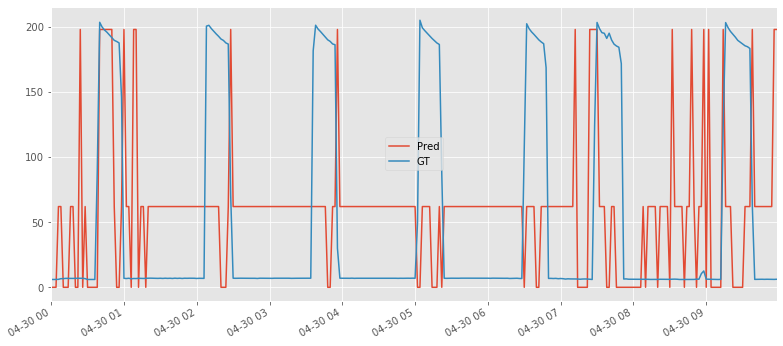

In [151]:
predictions['CO']['Fridge'].head(300).plot(label="Pred")
gt['Fridge'].head(300).plot(label="GT")
plt.legend()

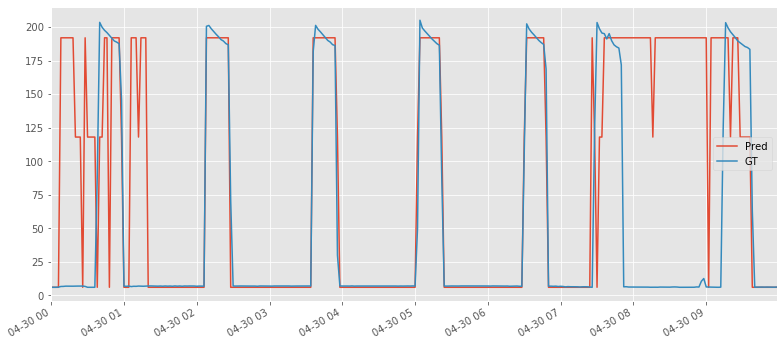

In [152]:

predictions['FHMM']['Fridge'].head(300).plot(label="Pred")
gt['Fridge'].head(300).plot(label="GT")
plt.legend()

In [153]:
def compute_rmse(gt, pred):
    from sklearn.metrics import mean_squared_error
    rms_error = {}
    for appliance in gt.columns:
        rms_error[appliance] = np.sqrt(mean_squared_error(gt[appliance], pred[appliance]))
    return pd.Series(rms_error)

In [154]:
rmse = {}
for clf_name in classifiers.keys():
    rmse[clf_name] = nilmtk.utils.compute_rmse(gt, predictions[clf_name])

rmse = pd.DataFrame(rmse)
rmse

,CO,FHMM
Fridge,107.806564,100.298563
Light,123.929298,73.632429
Sockets,24.509756,37.154094
Microwave,527.669861,545.865461
Dish washer,232.560165,186.108221


In [180]:

from rnndisaggregator import RNNDisaggregator

ModuleNotFoundError: No module named 'rnndisaggregator'